In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import numpy as np
import tensorflow as tf

In [2]:
def filter(realorgan, classification, classification_value, method):
    
    if(method == 'gan'):
        ds = pd.read_csv('forgan.csv', low_memory=False)
        columns = ['multiclassification', 'multiname', 'binaryclassification', 'binaryname', 'realorgan']
        col_real_gan = 'realorgan'
    
    elif(method == 'gaus'):
        ds = pd.read_csv('../gaus/forgaus_1.0.csv', low_memory=False)
        columns = ['multiclassification', 'binaryclassification', 'real_or_aug']
        col_real_gan = 'real_or_aug'

    elif(method == 'emsa'):
        ds = pd.read_csv('../emsa/foremsa_1.0.csv', low_memory=False)
        columns = ['multiclassification', 'binaryclassification', 'real_or_aug']
        col_real_gan = 'real_or_aug'

    x = ds[(ds[col_real_gan] == realorgan) & (ds[classification] == classification_value)]
    x = x.drop(columns, axis = 1)
    x = x.iloc[:]
    
    return x.mean()

In [3]:
def chart(classification, classification_value, method):
    realorgan = ['real', 'g']
    color = ['r', 'g']
    colors = {'Real':'red', 'GAN':'green'}

    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


    plt.figure(figsize=(8, 6))
    plt.xlabel(r"Wavenumber ($\mathregular{cm^{-1}}$)")
    plt.ylabel('Intensity (a.u.)')

    # classification = 'multiclassification'
    # classification_value = 4
    # method = 'gan'

    for f in range(0, len(realorgan)):
        x = filter(realorgan[f], classification, classification_value, method)

        if f == 0:
            plt.plot(x.index, x.values, color=color[f], linestyle = '-', linewidth=2)
            plt.xticks(plt.xticks()[0][1::100], fontsize = 10)
            plt.legend(handles, labels)

        elif f == 1:
            plt.plot(x.index, x.values, color=color[f], linestyle = '--', linewidth=1)
        
        # Set font size for tick labels
    plt.xticks(fontsize=10)  # Set font size for x-ticks
    plt.yticks(fontsize=10)  # Set font size for y-ticks

    plt.show()
    

In [4]:
def ratio(classification, classification_value, method):
    real_spectrum = filter('real', classification, classification_value, method)
    gan_spectrum = filter('g', classification, classification_value, method)

    ratio = real_spectrum / gan_spectrum

    plt.figure(figsize=(8,6))
    plt.ylabel('Ratio of Intensity')
    plt.xlabel(r"Wavenumber ($\mathregular{cm^{-1}}$)")

    plt.plot(ratio.index, ratio.values, color='black', linestyle='-', linewidth = 1, label='Real/GAN Ratio')

    # Customize ticks and legend
    plt.xticks(plt.xticks()[0][1::100])

    # Customize ticks and legend
    plt.xticks(fontsize=10)  # Set font size for x-ticks
    plt.yticks(fontsize=10)  # Set font size for y-ticks

    plt.show()

    print(ratio.values.mean())

In [5]:
def KL(classification, classification_value, method):
    
    real_spectrum = filter('real', classification, classification_value, method)
    gan_spectrum = filter('g', classification, classification_value, method)

    kl_divergence = tf.keras.losses.kullback_leibler_divergence(real_spectrum, gan_spectrum)
    print("KL Divergence:", kl_divergence)

    kl_divergence1 = tf.keras.losses.kullback_leibler_divergence(gan_spectrum, real_spectrum)
    print("KL Divergence:", kl_divergence1)

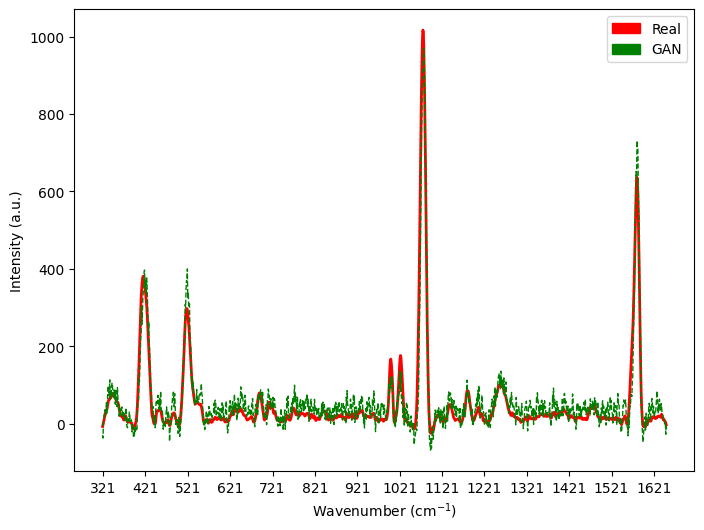

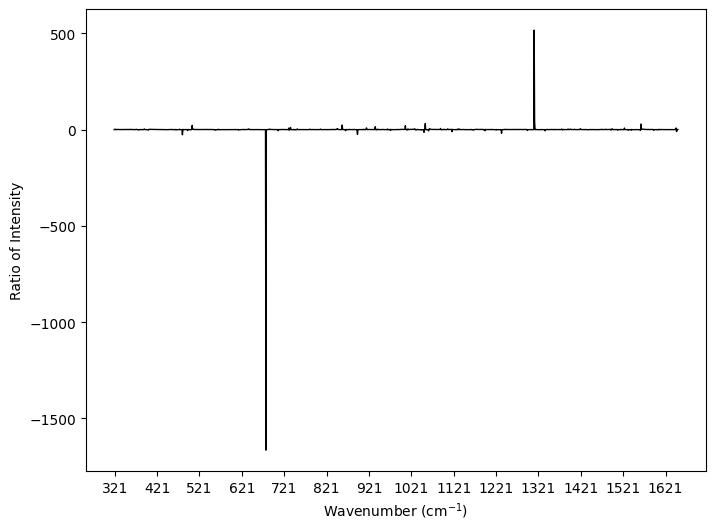

-0.15728458718728477
KL Divergence: tf.Tensor(1287.5553413060106, shape=(), dtype=float64)
KL Divergence: tf.Tensor(203.1010188419115, shape=(), dtype=float64)


In [38]:
classification = 'multiclassification'
classification_value = 4
method = 'gan'

chart(classification, classification_value, method)
ratio(classification, classification_value, method)
KL(classification, classification_value, method)

In [24]:
ds_omicran = pd.read_csv('../data/Omicran_sample.csv', low_memory = False)
ds_omicran = ds_omicran[(ds_omicran['binaryclassification'] == 0)]
ds_omicran = ds_omicran.drop(['protein', 'binaryclassification'], axis = 1)
ds_omicran = ds_omicran.mean()

ds_real = pd.read_csv('forgan_real.csv', low_memory = False)
ds_real = ds_real[(ds_real['binaryclassification'] == 0)]
ds_real = ds_real.drop(['multiclassification', 'binaryclassification'], axis = 1)
ds_real = ds_real.mean()

def shift_to_non_negative(array):
    min_val = np.min(array)
    offset = abs(min_val) + 1e-10
    return array + offset

# Shift the arrays
a_shifted = shift_to_non_negative(ds_omicran)
b_shifted = shift_to_non_negative(ds_real)

# Normalize the distributions
a_prob = a_shifted / np.sum(a_shifted)
b_prob = b_shifted / np.sum(b_shifted)

# Calculate KL Divergence
kl_divergence = entropy(a_prob, b_prob)

print("KL Divergence (a || b):", kl_divergence)

kl_divergence1 = entropy(b_prob, a_prob)
print("KL Divergence (b || a):", kl_divergence1)

KL Divergence (a || b): 0.06332013554021307
KL Divergence (b || a): 0.06378436426990344


In [28]:
classification = 'multiclassification'
classification_value = 2
method = 'gaus'

p = filter('real', classification, classification_value, method)
q = filter('g', classification, classification_value, method)

def shift_to_non_negative(array):
    min_val = np.min(array)
    offset = abs(min_val) + 1e-10
    return array + offset

# Shift the arrays
a_shifted = shift_to_non_negative(p)
b_shifted = shift_to_non_negative(q)

# Normalize the distributions
a_prob = a_shifted / np.sum(a_shifted)
b_prob = b_shifted / np.sum(b_shifted)

# Calculate KL Divergence
kl_divergence = entropy(a_prob, b_prob)

print("KL Divergence (a || b):", kl_divergence)

kl_divergence1 = entropy(b_prob, a_prob)
print("KL Divergence (b || a):", kl_divergence1)

KL Divergence (a || b): 8.385499683165396e-05
KL Divergence (b || a): 8.380341294553229e-05


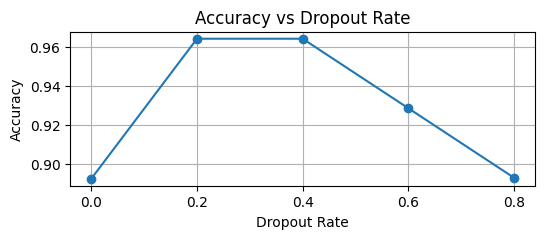

In [9]:
# Data
dropout_rates = [0.0, 0.2, 0.4, 0.6, 0.8]
accuracies = [0.8924, 0.9643, 0.9643, 0.9286, 0.8929]

# Create the plot
plt.figure(figsize=(6, 2))
plt.plot(dropout_rates, accuracies, marker='o')

# Adding labels and title
plt.title('Accuracy vs Dropout Rate')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.xticks(dropout_rates)  # set the x-ticks to be the dropout rates

# Show grid
plt.grid()

# Show the plot
plt.show()

In [10]:
ds_epoch = pd.read_csv('forganbyepoch.csv', low_memory = False)
ds_epoch = ds_epoch[(ds_epoch['multiname'] == '10000')]
ds_epoch = ds_epoch.drop(['multiname'], axis = 1)
ds_epoch = ds_epoch.mean()

ds_real = pd.read_csv('forganbyepoch.csv', low_memory = False)
ds_real = ds_real[(ds_real['multiname'] == 'S')]
ds_real = ds_real.drop(['multiname'], axis = 1)
ds_real = ds_real.mean()

def shift_to_non_negative(array):
    min_val = np.min(array)
    offset = abs(min_val) + 1e-10
    return array + offset

# Shift the arrays
a_shifted = shift_to_non_negative(ds_epoch)
b_shifted = shift_to_non_negative(ds_real)

# Normalize the distributions
a_prob = a_shifted / np.sum(a_shifted)
b_prob = b_shifted / np.sum(b_shifted)

# Calculate KL Divergence
kl_divergence = entropy(a_prob, b_prob)

print("KL Divergence (a || b):", kl_divergence)

kl_divergence1 = entropy(b_prob, a_prob)
print("KL Divergence (b || a):", kl_divergence1)


KL Divergence (a || b): 0.021403418805746956
KL Divergence (b || a): 0.020602308748033496
